In [53]:
import time
import random
import matplotlib.pyplot as plt 
import matplotlib.patches as patches

In [2]:
#reference: https://jrtechs.net/data-science/implementing-a-quadtree-in-python

## Node class

In [3]:
# Node class is a rectangle in the quardtree
# with (x0, y0) as coordinates, w as width, h as height
class Node():
    def __init__(self, x0, y0, w, h):
        self.x0 = x0
        self.y0 = y0
        self.width = w
        self.height = h
        self.children = []

    def get_location(self):
        return (self.x0, self.yo)
    
    def get_width(self):
        return self.width
    
    def get_height(self):
        return self.height
    
    def get_children(self):
        return self.children

In [13]:
# Method about find the children
# TODO: FIND the dictionary of all nodes that can be divide(the leaf)
# TODO: FIND the dictionary of all nodes that can be fuse(the parent)
def find_children(node):
    if not node.children:
        return [node]
    else:
        children = []
        for child in node.children:
            children +=(find_children(child))
    return children

## QTree class

In [42]:
# QTree class which can do the divide and graph of quardtree
class QTree():
    def __init__(self):
        self.root = Node(0, 0, 10, 10)
    def subdivide(self, node):
        w_ = float(node.width/2)
        h_ = float(node.height/2)
        x1 = Node(node.x0, node.y0, w_, h_)
        x2 = Node(node.x0, node.y0+h_, w_, h_)
        x3 = Node(node.x0 + w_, node.y0, w_, h_)
        x4 = Node(node.x0+w_, node.y0+h_, w_, h_)
        node.children = [x1, x2, x3, x4]
    def graph(self):
        fig, ax = plt.subplots(figsize=(20, 10))
        plt.title("Quadtree")
        ax.set_xlim(0, 10)
        ax.set_ylim(0, 10)
        c = find_children(self.root)
        print("Number of segments: %d" %len(c))
        areas = set()
        for el in c:
            areas.add(el.width*el.height)
        print("Minimum segment area: %.3f units" %min(areas))
        for n in c:
            #print((n.x0, n.y0), n.width, n.height)
            rect = patches.Rectangle((n.x0, n.y0), n.width, n.height, fill=False)
            ax.add_patch(rect)
        patches_list = ax.patches
        plt.show()

## Example

Number of segments: 7
Minimum segment area: 6.250 units
Rectangle(xy=(0, 0), width=2.5, height=2.5, angle=0)


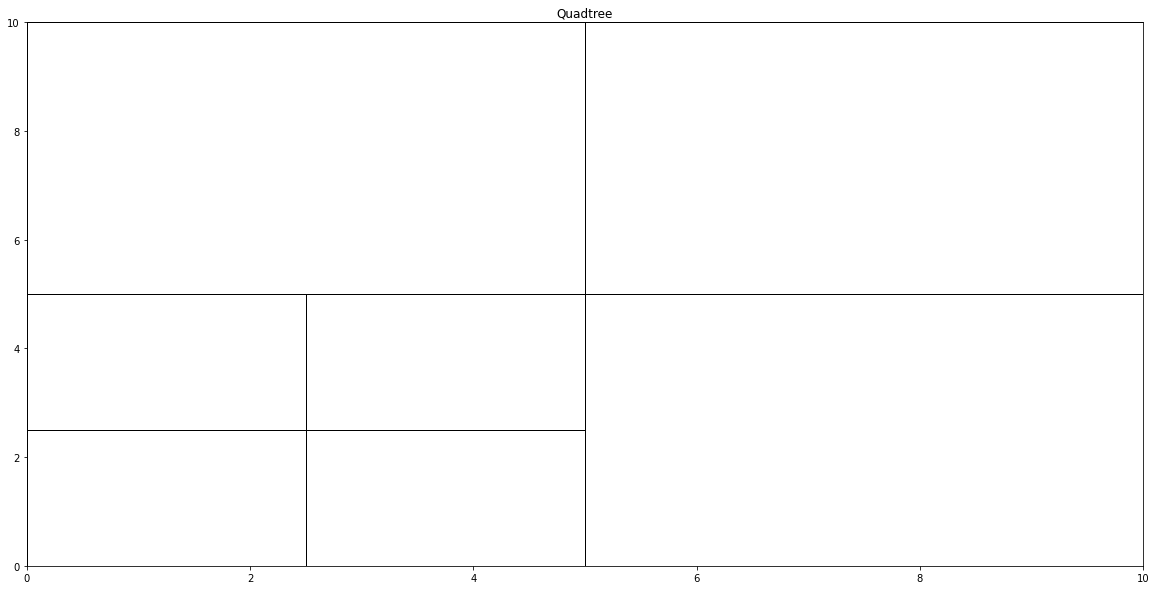

Rectangle(xy=(0, 2.5), width=2.5, height=2.5, angle=0)
Rectangle(xy=(2.5, 0), width=2.5, height=2.5, angle=0)
Rectangle(xy=(2.5, 2.5), width=2.5, height=2.5, angle=0)
Rectangle(xy=(0, 5), width=5, height=5, angle=0)
Rectangle(xy=(5, 0), width=5, height=5, angle=0)
Rectangle(xy=(5, 5), width=5, height=5, angle=0)


In [52]:
# example of using QTreee and divide the quadtree twice
quard = QTree()
# Divide the quard tree first time
quard.subdivide(quard.root)
# Divide the quard tree second time
quard.subdivide(find_children(quard.root)[0])
quard.graph() 

In [ ]:
t = 0
N = 1
for i in range(1,10):
    t+= random.expovariate(15)
    print (N, t)